In [5]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [6]:
metrics = ['f1', 'recall', 'cost', 'precision', 'accuracy']
paths = {
    'size-scalability': '../results/size-scalability',
    'thread-scalability': '../results/thread-scalability'
}

prefix = 'time'
experiments = {k:{} for k in paths}

In [7]:
def process_time(file):
    with open(file) as time_file:
        lines = time_file.readlines()
        """        lines = [line.strip() for line in lines if len(line) > 2]
        times = {
            'sys':[line for line in lines if 'sys' in line],
            'user' : [line for line in lines if 'user' in line],
            'real': [line for line in lines if 'real' in line]
        }
        
        for key in times:
            values = times[key]
            values = [v.split('\t')[1] for v in values]
            values = [float(v.split('m')[0])*60 + float(v.split('m')[1][:-1].replace(',', '.')) for v in values]
            times[key] = values"""
    return [int(time) for time in lines]
#process_time("/home/dcandrade/Documents/Subjects/Computação de Alto Desempenho/hpc-facial-expression-recognition/results/size-scalability/500/time.txt")

In [8]:
from os import walk
for experiment_type in paths:
    for (dirpath, dirnames, filenames) in walk(paths[experiment_type]):
        for file in filenames:
            if file.startswith(prefix):
                subtype = dirpath.split('/')[-1]
                experiment_file = paths[experiment_type]+'/'+subtype+'/'+file
                subtype_files = experiments[experiment_type].get(subtype,[])
                #subtype_files.append(pd.read_csv(experiment_file, header=0))
                experiments[experiment_type][subtype] = process_time(experiment_file)

In [9]:
size_df = pd.DataFrame(experiments['size-scalability']).transpose().rename(index=int).sort_index()
epochs_df = pd.DataFrame(experiments['thread-scalability']).transpose().rename(index=int)

In [10]:
size_df = pd.DataFrame(size_df.apply(sorted, axis=1))
size_df = size_df.applymap(lambda x: x[1:-1]).rename(columns={0:'Tempo (s)'}).sort_index()
size_df

,Tempo (s)
5865,"[499094, 499299, 499432]"
11730,"[909566, 909933, 910083]"
15640,"[1389946, 1391306, 1393508]"


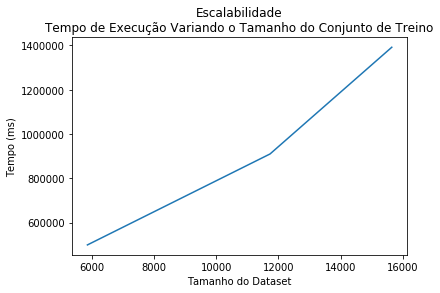

In [13]:
plot = size_df.applymap(pd.np.average).plot(legend=False)
plot.set_title("Escalabilidade\nTempo de Execução Variando o Tamanho do Conjunto de Treino")
plot.set_xlabel("Tamanho do Dataset")
plot.set_ylabel("Tempo (ms)")
plt.savefig(paths['size-scalability']+"/size-scalability.eps", format='eps')

In [14]:
epochs_df = pd.DataFrame(epochs_df.apply(sorted, axis=1))
epochs_df = epochs_df.applymap(lambda x: x[1:-1]).rename(columns={0:'Tempo (s)'}).sort_index()
epochs_df

,Tempo (s)
1,"[2251906, 2270086, 2284519]"
2,"[1436110, 1436250, 1436709]"
3,"[1349763, 1352199, 1352422]"
4,"[1454572, 1454727, 1455083]"


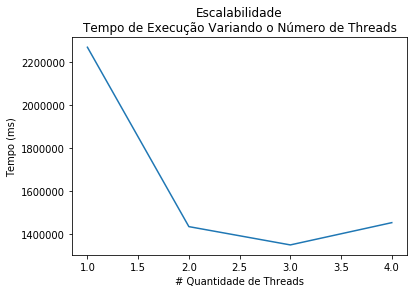

In [17]:
plot = epochs_df.applymap(pd.np.average).plot(legend=False)
plot.set_title("Escalabilidade\nTempo de Execução Variando o Número de Threads")
plot.set_xlabel("# Quantidade de Threads")
plot.set_ylabel("Tempo (ms)")
plt.savefig(paths['thread-scalability']+"/thread-scalability.eps", format='eps')

In [18]:
stats = epochs_df.applymap(pd.np.average)
stats['std'] = epochs_df.applymap(pd.np.std)
stats

,Tempo (s),std
1,2.268837e+06,13343.461395
2,1.436356e+06,255.838925
3,1.351461e+06,1204.348879
4,1.454794e+06,213.926779
